In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read the CSV and Perform Basic Data Cleaning
### Here is the list of contributions
* objectid - the identifier on boardgamegeeks.com
* name - name of the game
* yearpublished - the year the game was published
* sortindex - rank of the game on bbg.com
* minplayer - minumum number of players per the publishers
* maxplayers - maximum number of players per the publishers
* minplaytime - minimum playtime required per the publishers
* maxplaytime - maximum playtime per the publishers
* minage - minimum age requiremnet per the publishers
* min_community - minimum players per the community
* max_community - max players per the community
* totalvotes - total number of community vote
* playerage - minimum age requirement per the community
* languagedependence - a rank of amount of in-game text is required during game play (1: none, 5: unplayable in other language)
* userrated - number of users that have rated the game
* average - user average rating from 1-10
* baverage - from the site, determined to be an anti-skewing effort by bgg with system added mid range ratings (from 1-10)
* stddev - average standard deviation of a rating
* avgweight - a complexity rating from 1-5 Weight
* numweights - number of weight votes
* numgeeklists - number of geeks with game on list
* numtrading - number of people trading the game
* numwanting - number of people wanting the game
* numcomments - number of comments on the site on this game
* siteviews - number of views on the site
* numplays - number of times game was played (according to site users?)
* numplays_month - number of plays per month
* news - number news articles on game
* logs - number of blogs regarding game
* weblink - number of weblinks for the game
* podcast - number of podcasts on the game
* label - category of game (mostly boardgame)
* boardgamedesigner_cnt - count of designers
* boardgameartist_cnt - artist count
* boardgamepublisher_cnt - publisher count
* boardgamehonor_cnt - awards count
* boardgamecategory_cnt - category count
* boardgamemechanic_cnt - game mechanics count
* boardgameexpansion_cnt - expansion count
* boardgameversion_cnt - version count (languages)
* boardgamefamily_cnt - game family count
* boardgamedesigner - list of game designers
* boardgameartist - list of game artists
* boardgamepublisher - list of publishers
* boardgamehonor - list of awards
* boardgamecategory - list of categories
* boardgameversion - list of versions
* boardgamemechanic - a list of mechanics
* boardgameexpansion - a list of expansions
* boardgamefamily - a list of boardgames family
* description - full text description of game
* gamelink - a link to the game on bgg.com

In [2]:
game_info_df=pd.read_csv("../data/boardgames_07022021.csv")
game_info_df.head()

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
0,174430,Gloomhaven,2017,1,1,4,60,120,14,3.0,...,"['Alexandr Elichev', 'Josh T. McDowell', 'Alva...","['Cephalofair Games', 'Albi', 'Albi Polska', '...",['2017 Best Science Fiction or Fantasy Board G...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Chinese edition', 'Czech edition', 'English ...","['Action Queue', 'Action Retrieval', 'Campaign...",['Gloomhaven: Assault on the Morning Star (Pro...,"['Category: Dungeon Crawler', 'Components: Min...",Vanquish monsters with strategic cardplay. Ful...,/boardgame/174430/gloomhaven
1,161936,Pandemic Legacy Season 1,2015,2,2,4,60,60,13,4.0,...,['Chris Quilliams'],"['Z-Man Games', 'Asterion Press', 'Devir', 'Fi...",['2015 Board Game Quest Awards Best Coop Game ...,"['Environmental', 'Medical']","['Chinese blue edition', 'Chinese red edition'...","['Action Points', 'Cooperative Game', 'Hand Ma...",['None'],"['Components: Map (Global Scale)', 'Game: Pand...",Mutating diseases are spreading around the wor...,/boardgame/161936/pandemic-legacy-season-1
2,224517,Brass Birmingham,2018,3,2,4,60,120,14,3.0,...,"['Lina Cossette', 'David Forest', 'Damien Mamm...","['Roxley', 'Arclight', 'BoardM Factory', 'Conc...",['2018 Board Game Quest Awards Best Production...,"['Economic', 'Industry / Manufacturing', 'Tran...","['Chinese edition', 'Czech/English edition', '...","['Hand Management', 'Income', 'Loans', 'Market...",['None'],"['Cities: Birmingham (England)', 'Country: Eng...","Build networks, grow industries, and navigate ...",/boardgame/224517/brass-birmingham
3,167791,Terraforming Mars,2016,4,1,5,120,120,12,3.0,...,['Isaac Fryxelius'],"['FryxGames', 'Arclight', 'Bru00e4dspel.se', '...",['2016 Board Game Quest Awards Best Strategy/E...,"['Economic', 'Environmental', 'Industry / Manu...","['Bulgarian edition', 'Chinese edition', 'Chin...","['Drafting', 'End Game Bonuses', 'Hand Managem...",['French Championship Promo Cards (fan expansi...,"['Components: Map (Global Scale)', 'Components...",Compete with rival CEOs to make Mars habitable...,/boardgame/167791/terraforming-mars
4,233078,Twilight Imperium Fourth Edition,2017,5,3,6,240,480,14,6.0,...,['Scott Schomburg'],"['Fantasy Flight Games', 'ADC Blackfire Entert...",['2017 Golden Geek Best Strategy Board Game No...,"['Civilization', 'Economic', 'Exploration', 'N...","['Chinese edition', 'Czech edition', 'English ...","['Action Drafting', 'Area Majority / Influence...",['Twilight Imperium: Fourth Edition u2013 Prop...,"['Components: Hexagonal Tiles', 'Components: M...","Build an intergalactic empire through trade, r...",/boardgame/233078/twilight-imperium-fourth-edi...


In [3]:
# Get the general idea about the dataset value range
game_info_df.describe().T

,count,mean,std,min,25%,50%,75%,max
objectid,30000.0,80865.262567,96483.387063,1.0,8153.750000,16324.500000,160608.500000,3.395920e+05
yearpublished,30000.0,1955.428833,302.401196,-3500.0,1990.000000,2004.000000,2014.000000,2.022000e+03
sortindex,30000.0,15000.500000,8660.398374,1.0,7500.750000,15000.500000,22500.250000,3.000000e+04
minplayers,30000.0,2.026867,0.743301,0.0,2.000000,2.000000,2.000000,1.000000e+01
maxplayers,30000.0,5.828533,66.276316,0.0,3.000000,4.000000,6.000000,1.129900e+04
minplaytime,30000.0,61.964167,381.735666,0.0,20.000000,30.000000,60.000000,6.000000e+04
maxplaytime,30000.0,80.531433,452.395937,0.0,20.000000,45.000000,90.000000,6.000000e+04
minage,30000.0,8.900800,4.145954,0.0,7.000000,10.000000,12.000000,2.500000e+01
min_community,17571.0,3.129702,1.392790,1.0,2.000000,3.000000,4.000000,3.100000e+01
max_community,17795.0,4.259680,2.193913,1.0,3.000000,4.000000,5.000000,3.100000e+01


In [4]:
# remove duplicate games
game_info_df.drop_duplicates(subset=['objectid'], inplace=True)
# choose the attributes which have numerical datatype
game_info_df=game_info_df[['average', 'yearpublished',  'minplayers',
       'maxplayers', 'minplaytime', 'maxplaytime', 'minage', 'totalvotes', 'languagedependence',
       'usersrated', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'news', 'blogs', 'weblink', 'podcast']].copy()
# drop the null rows
game_info_df.dropna(inplace=True)
# remove the rows which have invalid values
game_info_df.drop(game_info_df[game_info_df['average'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['minplayers'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['maxplayers'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['minplaytime'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['maxplaytime'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['totalvotes'] ==0].index, inplace = True)
game_info_df.head()

,average,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,totalvotes,languagedependence,usersrated,...,numtrading,numwanting,numcomments,siteviews,numplays,numplays_month,news,blogs,weblink,podcast
0,8.77503,2017,1,4,60,120,14,1171,4,44354,...,535,1374,8021,10583753,368134,106,8,690,40,147
1,8.60721,2015,2,4,60,60,13,668,4,43007,...,310,850,6552,3385064,238259,32,10,653,70,170
2,8.66981,2018,2,4,60,120,14,521,1,21618,...,102,1477,3303,1816252,54092,58,4,208,23,28
3,8.42870,2016,1,5,120,120,12,1800,3,68412,...,453,2085,10034,6059031,393651,141,16,1473,71,163
4,8.68957,2017,3,6,240,480,14,335,4,14385,...,98,979,2206,2267902,21263,5,3,99,23,53


<AxesSubplot:>

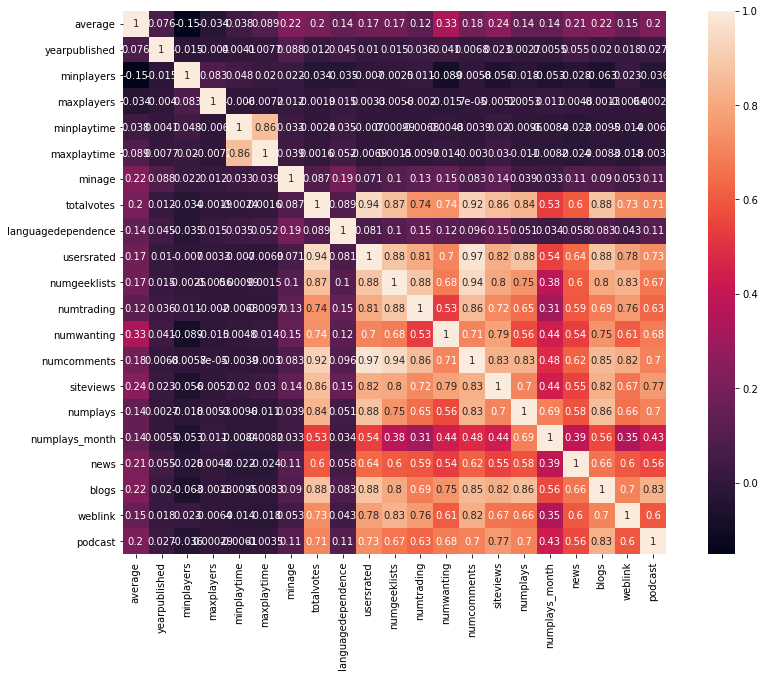

In [5]:
import seaborn as sns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data_explore = game_info_df
plt.figure(figsize=(15, 10))
corr_matrix = data_explore.corr()
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), square=True, annot=True)

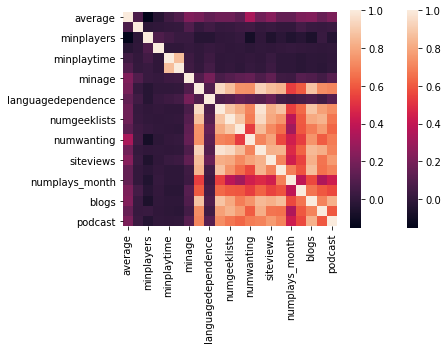

In [8]:
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), square=True, annot=False).figure.savefig("heat.svg", dpi=150)
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), square=True, annot=False).figure.savefig("heat.png", dpi=150)

In [7]:
corr_matrix['average'].sort_values(ascending=False)

average               1.000000
numwanting            0.333410
siteviews             0.238627
blogs                 0.222616
minage                0.219629
news                  0.211579
podcast               0.203860
totalvotes            0.195414
numcomments           0.179446
usersrated            0.171300
numgeeklists          0.171119
weblink               0.153304
numplays              0.144270
numplays_month        0.141565
languagedependence    0.138326
numtrading            0.124312
maxplaytime           0.088719
yearpublished         0.076064
minplaytime           0.037867
maxplayers           -0.033692
minplayers           -0.152005
Name: average, dtype: float64

In [8]:
corr_features_top=sorted(zip(corr_matrix['average'], game_info_df.columns), reverse=True)[:20]
top_features=[a[1] for a in corr_features_top]
top_features

['average',
 'numwanting',
 'siteviews',
 'blogs',
 'minage',
 'news',
 'podcast',
 'totalvotes',
 'numcomments',
 'usersrated',
 'numgeeklists',
 'weblink',
 'numplays',
 'numplays_month',
 'languagedependence',
 'numtrading',
 'maxplaytime',
 'yearpublished',
 'minplaytime',
 'maxplayers']

## Select features, Create Train Test Split, Scale the data

In [9]:
# Set features (X) and target (y)
y=game_info_df['average']
X=game_info_df.drop(['average'],axis=1)
X.shape, y.shape

((19316, 20), (19316,))

In [10]:
feature_names=X.columns
feature_names

Index(['yearpublished', 'minplayers', 'maxplayers', 'minplaytime',
       'maxplaytime', 'minage', 'totalvotes', 'languagedependence',
       'usersrated', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'news', 'blogs', 'weblink',
       'podcast'],
      dtype='object')

In [11]:
# Create a Train Test Split (20/80)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.2,random_state=101)
X_train.shape, y_train.shape

((3863, 20), (3863,))

In [12]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Perform feature selection

In [13]:
from sklearn.ensemble import RandomForestRegressor
 # Create a random forest regressor
rf = RandomForestRegressor(n_estimators=500)
rf = rf.fit(X_train_scaled, y_train)
print(f"Training Data Score: {rf.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test):.5f}")

Training Data Score: 0.94676
Testing Data Score: 0.60175


In [14]:
importances = rf.feature_importances_
rf_feature_importance=sorted(zip(importances, feature_names), reverse=True)
rf_feature_importance

[(0.3409957819351293, 'numwanting'),
 (0.1512275727679125, 'yearpublished'),
 (0.0717093563200368, 'maxplaytime'),
 (0.0665394447181039, 'numtrading'),
 (0.049992058965746516, 'numplays'),
 (0.04856182748462391, 'numgeeklists'),
 (0.04174312380933558, 'siteviews'),
 (0.035940422598913974, 'usersrated'),
 (0.030200456712203623, 'minage'),
 (0.028240298363540806, 'maxplayers'),
 (0.027962099118532945, 'numcomments'),
 (0.02301382861794176, 'totalvotes'),
 (0.017467679953987958, 'weblink'),
 (0.01677660469459971, 'minplaytime'),
 (0.01575396443098412, 'languagedependence'),
 (0.014934574969591772, 'blogs'),
 (0.0077657598130768, 'podcast'),
 (0.005327191816898929, 'minplayers'),
 (0.002956468090465854, 'news'),
 (0.002891484818373444, 'numplays_month')]

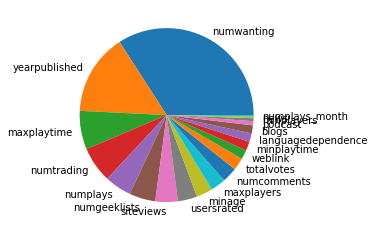

In [15]:
plt.pie([a[0] for a in rf_feature_importance],labels=[a[1] for a in rf_feature_importance],normalize=True)
plt.show()

In [16]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor()
dtr = dtr.fit(X_train_scaled, y_train)
dtr.score(X_train_scaled, y_train)
print(f"Training Data Score: {dtr.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {dtr.score(X_test_scaled, y_test):.5f}")

Training Data Score: 1.00000
Testing Data Score: 0.15382


In [17]:
importances = dtr.feature_importances_
dtr_feature_importance=sorted(zip(importances, feature_names), reverse=True)
dtr_feature_importance

[(0.33828816103040177, 'numwanting'),
 (0.15143385730156153, 'yearpublished'),
 (0.07431710274632101, 'maxplaytime'),
 (0.066457238571835, 'numtrading'),
 (0.048185203919300305, 'numplays'),
 (0.046325754727059076, 'numgeeklists'),
 (0.04322342793891399, 'siteviews'),
 (0.04112159190896337, 'usersrated'),
 (0.03339391379661788, 'numcomments'),
 (0.03286500832111889, 'minage'),
 (0.02232094871219844, 'maxplayers'),
 (0.020449271187284408, 'totalvotes'),
 (0.015985237332341903, 'minplaytime'),
 (0.014560030182740664, 'weblink'),
 (0.01386278056628528, 'languagedependence'),
 (0.012473889938815522, 'podcast'),
 (0.010931464021920773, 'blogs'),
 (0.00802819318993867, 'minplayers'),
 (0.003282262066362905, 'numplays_month'),
 (0.0024946625400186257, 'news')]

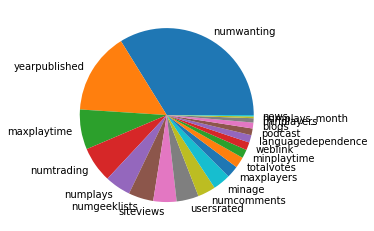

In [18]:
plt.pie([a[0] for a in dtr_feature_importance],labels=[a[1] for a in dtr_feature_importance],normalize=True)
plt.show()